In [ ]:
import pandas

import seaborn
from matplotlib import pyplot
from IPython.display import Image, display

from pathlib import Path

import json

In [ ]:
FILTERED_REAL_SET = 91123
FILTERING_WORKFLOW = 17313 
DATA_LOCATION = Path('../../superwasp-data/')

## Merge subject metadata with CNN scores

In [ ]:
zoo_lookup = pandas.read_csv(
    DATA_LOCATION / 'lookup.dat',
    delim_whitespace=True,
    header=None,
)
zoo_lookup.columns = [
    'subject_id',
    'SWASP ID',
    'Period',
    'Period Number',
]

In [ ]:
zoo_subjects = pandas.read_csv(
    DATA_LOCATION / 'superwasp-variable-stars-subjects.csv',
)
zoo_subjects = zoo_subjects[['subject_id', 'subject_set_id', 'workflow_id', 'retired_at', 'locations']]
zoo_subjects = zoo_subjects.merge(zoo_lookup)
zoo_subjects['file'] = zoo_subjects.apply(lambda r: f"{r['SWASP ID']}_P{r['Period Number']}_fold.gif", axis=1)
zoo_subjects['locations'] = zoo_subjects.apply(lambda r: list(json.loads(r['locations']).values())[0], axis=1)
zoo_subjects.rename({'locations': 'location'}, axis=1, inplace=True)
zoo_subjects

,subject_id,subject_set_id,workflow_id,retired_at,location,SWASP ID,Period,Period Number,file
0,21803097,25294,NaN,NaN,https://panoptes-uploads.zooniverse.org/subjec...,1SWASPJ235711.82+203913.7,1039108.812,1,1SWASPJ235711.82+203913.7_P1_fold.gif
1,21803099,25294,NaN,NaN,https://panoptes-uploads.zooniverse.org/subjec...,1SWASPJ235711.86-443012.2,8565206.000,1,1SWASPJ235711.86-443012.2_P1_fold.gif
2,21803099,99480,17313.0,2022-03-03 18:29:16 UTC,https://panoptes-uploads.zooniverse.org/subjec...,1SWASPJ235711.86-443012.2,8565206.000,1,1SWASPJ235711.86-443012.2_P1_fold.gif
3,21803102,25294,NaN,NaN,https://panoptes-uploads.zooniverse.org/subjec...,1SWASPJ235712.73+560850.9,427987.000,1,1SWASPJ235712.73+560850.9_P1_fold.gif
4,21803103,25294,NaN,NaN,https://panoptes-uploads.zooniverse.org/subjec...,1SWASPJ235712.73+560850.9,325253.969,3,1SWASPJ235712.73+560850.9_P3_fold.gif
...,...,...,...,...,...,...,...,...,...
3413055,27472158,61241,NaN,NaN,https://panoptes-uploads.zooniverse.org/subjec...,1SWASPJ235711.12+554414.6,275688.125,1,1SWASPJ235711.12+554414.6_P1_fold.gif
3413056,27472159,61241,NaN,NaN,https://panoptes-uploads.zooniverse.org/subjec...,1SWASPJ235711.21-644054.6,9000393.000,1,1SWASPJ235711.21-644054.6_P1_fold.gif
3413057,27472159,99480,17313.0,2022-04-06 11:58:06 UTC,https://panoptes-uploads.zooniverse.org/subjec...,1SWASPJ235711.21-644054.6,9000393.000,1,1SWASPJ235711.21-644054.6_P1_fold.gif
3413058,27472160,61241,NaN,NaN,https://panoptes-uploads.zooniverse.org/subjec...,1SWASPJ235711.22-644053.9,9002109.000,1,1SWASPJ235711.22-644053.9_P1_fold.gif


In [ ]:
filtering_workflow = zoo_subjects[(zoo_subjects['workflow_id'] == FILTERING_WORKFLOW) & zoo_subjects['retired_at'].notna()]
filtered_real_subjects = zoo_subjects[zoo_subjects['subject_set_id'] == FILTERED_REAL_SET]

In [ ]:
cnn_scores = pandas.read_csv(DATA_LOCATION / 'svs-junk-predictions.csv', header=0, names=['file', 'prediction'])
cnn_scores = cnn_scores.merge(filtering_workflow)
cnn_scores['zoo_classification_real'] = cnn_scores['subject_id'].isin(filtered_real_subjects['subject_id'])
cnn_scores = cnn_scores[['file', 'subject_id', 'prediction', 'zoo_classification_real', 'location']]

## Plot distribution of scores vs human classifications

<AxesSubplot:xlabel='zoo_classification_real', ylabel='prediction'>

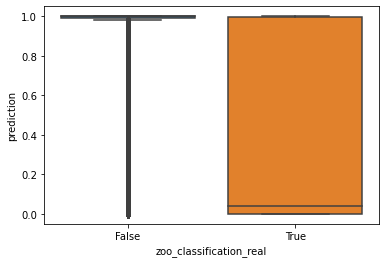

In [ ]:
seaborn.boxplot(data=cnn_scores, x='zoo_classification_real', y='prediction')

<AxesSubplot:ylabel='Frequency'>

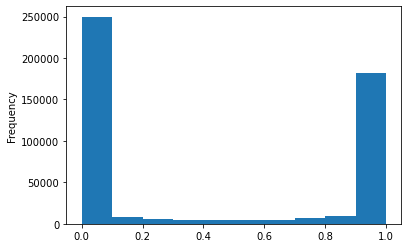

In [ ]:
cnn_scores[cnn_scores['zoo_classification_real']]['prediction'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

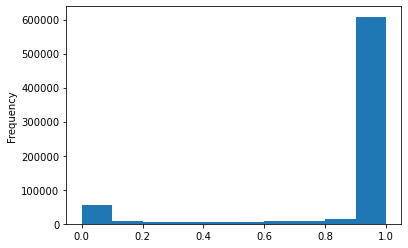

In [ ]:
cnn_scores[~cnn_scores['zoo_classification_real']]['prediction'].plot.hist()

## Count classifications

In [ ]:
zoo_classifications = pandas.read_csv(
    DATA_LOCATION / 'superwasp-variable-stars-classifications.csv',
)
zoo_classifications.rename({'subject_ids': 'subject_id'}, axis=1, inplace=True)

c:\Users\anm83\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
misclassified_subject_classifications = zoo_classifications[
    (zoo_classifications['workflow_id'] == FILTERING_WORKFLOW)
]

In [ ]:
classification_counts = pandas.pivot_table(
    misclassified_subject_classifications[misclassified_subject_classifications['subject_id'].isin(misclassified_real_as_junk['subject_id'])],
    values='classification_id',
    aggfunc=len,
    index='subject_id',
)
classification_counts.rename({'classification_id': 'classification_count'}, axis=1, inplace=True)
classification_counts

<AxesSubplot:ylabel='Frequency'>

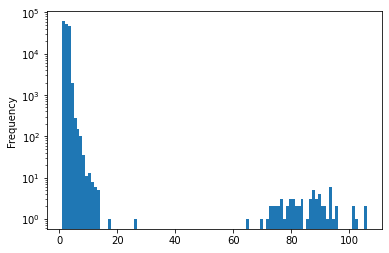

In [ ]:
classification_counts['classification_count'].plot.hist(logy=True, bins=max(classification_counts['classification_count']))

# Plot sample of misclassified subjects

In [ ]:
misclassified_real_as_junk = cnn_scores[cnn_scores['zoo_classification_real'] & (cnn_scores['prediction'] > 0.5)]
misclassified_real_as_junk = misclassified_real_as_junk.merge(classification_counts)


In [ ]:
for url in misclassified_real_as_junk.head(10)['location']:
    display(Image(url=url))